**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

# *Genre classification using k-nearest neighbors vote* 

## Abstract

*Precise summary of the whole report, previews the contents and results. Must be a single paragraph between 100 and 200 words.*



## 1. Introduction

*Background, problem statement, motivation, many references, description of
contents. Introduces the reader to the topic and the broad context within which your
research/project fits*

*- What do you hope to learn from the project?*
*- What question is being addressed?*
*- Why is this task important? (motivation)*

*Keep it short (half to 1 page).*



## 2. Data analysis

*Briefly describe data (class distribution, dimensionality) and how will it affect
classification. Visualize the data. Don’t focus too much on the meaning of the features,
unless you want to.*

*- Include histograms showing class distribution.*



In [ ]:
# Run this cell if the notebook complains about missing libraries
!pip3 install matplotlib scikit-learn numpy pandas

In [2]:
# Import libraries that will be used in the project
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [3]:
# Load the data and cleanup
train_data_path = "train_data.csv"
labels_path = "train_labels.csv"
test_data_path = "test_data.csv"

genres_labels = np.array(pd.read_csv(labels_path, index_col=False, header=None))
training_data_set = np.array(pd.read_csv(train_data_path, index_col=False, header=None))

In [ ]:
#Analysis of the input data
# ...

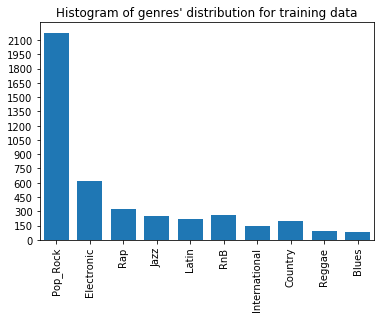

In [5]:
genres = ['Pop_Rock',
          'Electronic',
          'Rap',
          'Jazz',
          'Latin',
          'RnB',
          'International',
          'Country',
          'Reggae',
          'Blues']

plt.figure(1)
plt.title("Distribution of genres in the training data")
original_bins = np.arange(1, 12) - 0.5
counts, bins, patches = plt.hist(genres_labels, bins=original_bins, rwidth=0.75)
plt.xticks(range(1, 11), genres, rotation='vertical')
plt.yticks(np.arange(0, np.max(counts), 150))
plt.xlim([0.5, 10.5])
plt.show()

## 3. Methods and experiments

*- Explain your whole approach (you can include a block diagram showing the steps in your process).* 

*- What methods/algorithms, why were the methods chosen. *

*- What evaluation methodology (cross CV, etc.).*



In [ ]:
# Trials with ML algorithms

## 4. Results

*Summarize the results of the experiments without discussing their implications.*

*- Include both performance measures (accuracy and LogLoss).*

*- How does it perform on kaggle compared to the train data.*

*- Include a confusion matrix.*



In [ ]:
#Confusion matrix ...

## 5. Discussion/Conclusions

*Interpret and explain your results *

*- Discuss the relevance of the performance measures (accuracy and LogLoss) for
imbalanced multiclass datasets. *

*- How the results relate to the literature. *

*- Suggestions for future research/improvement. *

*- Did the study answer your questions? *



## 6. References

*List of all the references cited in the document*

## Appendix
*Any additional material needed to complete the report can be included here. For example, if you want to keep  additional source code, additional images or plots, mathematical derivations, etc. The content should be relevant to the report and should help explain or visualize something mentioned earlier. **You can remove the whole Appendix section if there is no need for it.** *